## Credit Card Fraud Detection - Task3

### Load transaction data

In [1]:
import pandas as pd
import numpy as np

# Read transaction data from log file
transaction_data = pd.read_csv("data/task3_data.csv")
transaction_data.head()

,DateTime,Amount,Class,year,month,day,hour,minute,CardKind,CardLimit,CardHomeLocation,CustomerNo,TerminalKind,TerminalMerchant,TerminalLocation,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction
0,2018-06-10 00:36:00,1615,0,2018,6,10,0,36,1,1,65,54167,0,0,65,1,0,0,1
1,2018-06-10 00:36:00,1641,0,2018,6,10,0,36,1,1,62,77239,1,4,99,0,0,1,0
2,2018-06-10 00:36:00,4623,1,2018,6,10,0,36,1,1,61,58492,1,1,99,0,0,1,0
3,2018-06-10 00:36:00,13330,0,2018,6,10,0,36,1,3,73,76727,0,0,73,1,0,0,1
4,2018-06-10 00:36:00,4354,0,2018,6,10,0,36,1,1,63,14681,1,2,63,1,0,0,1


### Feature Importances

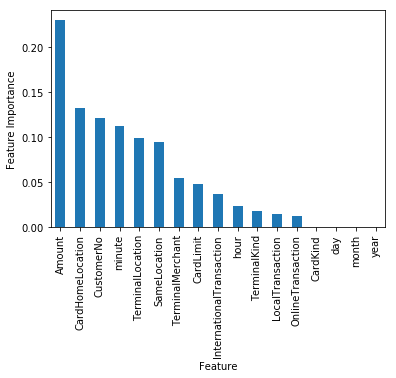

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle

import matplotlib.pyplot as plt

transaction_data = shuffle(transaction_data)

X = transaction_data.drop(['Class', 'DateTime'], axis=1)
y = transaction_data['Class']

feature_list = list(X)

feature_model = ExtraTreesClassifier()
feature_model = feature_model.fit(X, y)

feat_imp = pd.Series(feature_model.feature_importances_, feature_list).sort_values(ascending=False)
feat_imp.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.show()

LR: 0.38 (0.08)
LDA: 0.40 (0.06)


T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
T:\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


KNN: 0.35 (0.05)
CART: 0.55 (0.02)
RF: 0.46 (0.06)
GB: 0.55 (0.04)
MLP: 0.47 (0.05)
NB: 0.28 (0.04)
SVM: 0.29 (0.06)


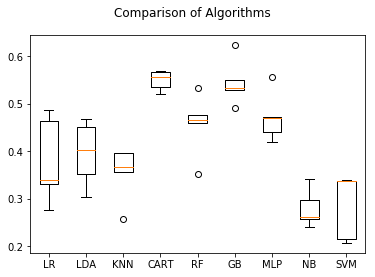

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
#from xgboost import XGBClassifier

X = transaction_data.drop(['Class', 'DateTime'], axis=1)
y = transaction_data['Class']

scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
#models.append(('XGB', XGBClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = [] 
for name, model in models:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, X_transformed, y, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    print("%s: %.2f (%.2f)" % (name, cv_results.mean(), cv_results.std()))
    
fig = plt.figure()
fig.suptitle('Comparison of Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Train/Test(Validation) Split

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = transaction_data.drop(['Class', 'DateTime'], axis=1)
y = transaction_data['Class']

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5788, 17) (5788,)
(1448, 17) (1448,)


### Build Prediction Model Using Chosen Classification Algorithm

In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Test Prediction Model

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_test_predicted = model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_predicted)

print('*****Test*****')
print("Accuracy = %.2f" % accuracy)
print(classification_report(y_test, y_test_predicted))

*****Test*****
Accuracy = 0.95
             precision    recall  f1-score   support

          0       0.97      0.98      0.97      1357
          1       0.61      0.55      0.58        91

avg / total       0.95      0.95      0.95      1448



In [15]:
from sklearn.metrics import confusion_matrix

results = confusion_matrix(y_test, y_test_predicted)
tn, fp, fn, tp = results.ravel()
print('Confusion matrix:')
print(results)
print("True Positives (TP) = %d" % tp)
print("True Negatives (TN) = %d" % tn)
print("False Positives (FP) = %d (Type1 error)" % fp)
print("False Negatives (FN) = %d (Type2 error)" % fn)

Confusion matrix:
[[1325   32]
 [  41   50]]
True Positives (TP) = 50
True Negatives (TN) = 1325
False Positives (FP) = 32 (Type1 error)
False Negatives (FN) = 41 (Type2 error)
